In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced

In [3]:
df = pd.read_csv("spam.csv", encoding="latin_1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']).rename(columns={"v1" : "target", "v2" : "text"})

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


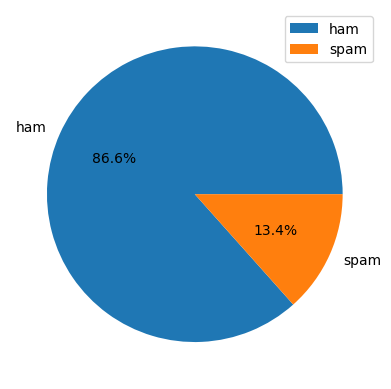

In [62]:
vals = df['target'].value_counts()
plt.pie(vals, autopct="%1.1f%%", labels=vals.index)
plt.legend()
plt.show()

In [9]:
df.sample(15)

,target,text
3971,ham,WOT U UP 2 J?
4783,ham,Indeed and by the way it was either or - not b...
4201,ham,Are you happy baby ? Are you alright ? Did you...
267,spam,Ur ringtone service has changed! 25 Free credi...
2725,ham,No. But we'll do medical missions to nigeria
996,ham,Yetunde i'm in class can you not run water on ...
3583,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
2985,spam,Reply to win å£100 weekly! What professional s...
2523,ham,"Sorry, I'll call later"
3035,ham,;-) ok. I feel like john lennon.


In [13]:
tv = TfidfVectorizer(binary=False, norm='l2', use_idf=False, smooth_idf=False, lowercase=True, stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', min_df=1, max_df=1.0, max_features=None, ngram_range=(1, 1))

In [15]:
df.isnull().sum()

target          0
text            0
cleaned_text    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        5572 non-null   object
 1   text          5572 non-null   object
 2   cleaned_text  5572 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


In [19]:
X, Y = df['text'], df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train = tv.fit_transform(x_train)
x_test = tv.transform(x_test)

In [23]:
type(x_train)

scipy.sparse._csr.csr_matrix

In [25]:
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

In [27]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)

In [29]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_dense.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision', 'recall'])

history = model.fit(
    x_train_dense, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=16,
    verbose=1
)

C:\Users\ibunc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.3716 - precision: 0.4799 - recall: 0.1319 - val_loss: 0.0907 - val_precision: 0.9346 - val_recall: 0.8547
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0348 - precision: 0.9790 - recall: 0.9537 - val_loss: 0.0805 - val_precision: 0.9541 - val_recall: 0.8889
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0066 - precision: 0.9982 - recall: 0.9887 - val_loss: 0.1062 - val_precision: 0.9608 - val_recall: 0.8376
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0074 - precision: 0.9993 - recall: 0.9900 - val_loss: 0.0845 - val_precision: 0.9550 - val_recall: 0.9060
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0047 - precision: 0.9940 - recall: 0.9885 - val_loss: 0.1003 - val_precision: 0.9623 - val_recall: 0.8718
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0012 - precision: 0.9998 - recall: 0.9991 - val_loss: 0.1104 - val_precision: 0.9714 - val_

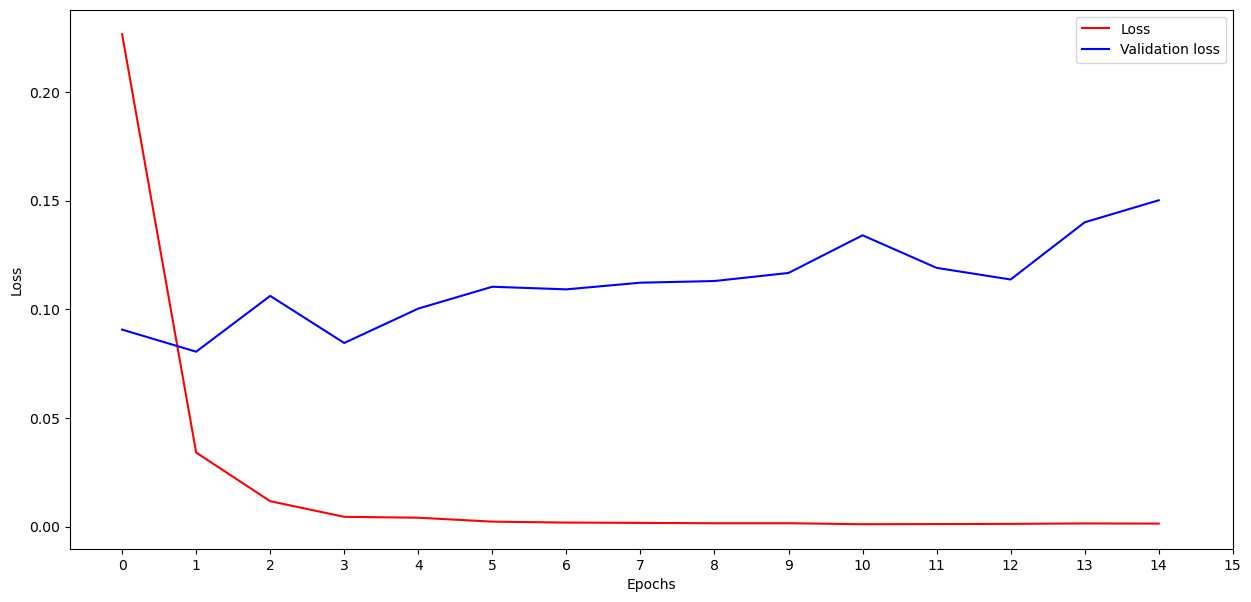

In [60]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['loss'], label='Loss', color='Red')
plt.plot(history.history['val_loss'], label='Validation loss', color='Blue')
plt.xticks(range(0, 16))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
preds = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [66]:
def eval(actual, preds):
    encoded = encoder.fit_transform(actual)
    confmat = confusion_matrix(encoded, preds.round())
    sns.heatmap(confmat, annot=True, cmap='crest', fmt='5.2f')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    print(classification_report_imbalanced(encoded, preds.round()))

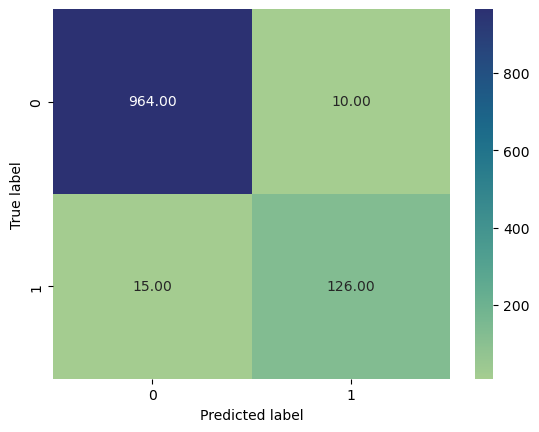

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.89      0.99      0.94      0.89       974
          1       0.93      0.89      0.99      0.91      0.94      0.88       141

avg / total       0.98      0.98      0.91      0.98      0.94      0.89      1115



In [68]:
eval(y_test, preds)